# Lab: Neural networks

## Exercise 4

> In this final exercise you will have to create a neural network to classify hand written numbers. Such a neural network is for example used in the post sorting process.

> The dataset consists of images of hand written numbers ranging from 0 till 9.

> Your goal is to train a neural network on the training set (*X_train*) and predict on the test_set (*X_test*)

> Try to get an accuracy as high as possible. Decide yourself what to modify. You can modify for example: the learning_rate, amount of layers, neurons per layer, preprocessing methods, gradient descent to stochastic gradient descent/ batch gradient descent...

> Feel free to change other aspects too if you want (e.g. activation function, but then you have to change to backprop algorithm).

#### A few hints:

> Calculate the accuracy on both the training set (X_train) and testing set (X_test) to see if there is a large difference

> You can also do this every 5,10,... epochs (monitor the accuracy)

> Calculate the loss on the training set, but also the test set (monitor the loss)

> Plot these


Name: Benjamin Fraeyman

#### Imports

In [1]:
import numpy as np
import matplotlib.pylab as plt
from NN_Helper import Gradient_Checker
gradient_checker = Gradient_Checker(limit=1.0*np.exp(-8))
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.datasets import load_digits
import random

#### Create toy dataset


X.shape: (1797L, 64L)
y.shape: (1797L, 10L)
X_train.shape: (1700L, 64L)
X_test.shape: (97L, 64L)
y_train.shape: (1700L, 10L)
y_test.shape: (97L, 10L)


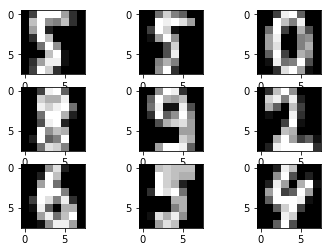

In [2]:
# Set containing samples with features
data = load_digits(10)
X = data['data']
print "X.shape:", X.shape
y = data['target']

encoder = OneHotEncoder()
y = encoder.fit_transform(np.reshape(y,(len(y),1))).toarray()
print "y.shape:", y.shape

X, y = shuffle(X, y, random_state=0)

X_train = X[:1700]
print "X_train.shape:", X_train.shape
X_test = X[1700:]
print "X_test.shape:", X_test.shape
y_train = y[:1700]
print "y_train.shape:", y_train.shape
y_test = y[1700:]
print "y_test.shape:", y_test.shape

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(np.reshape(X[i*100],(8,8)),cmap=plt.cm.gray,interpolation='None')
plt.show()

**Re-use the code of exercise 3 (backwards, forwards, loss,...)** (you may use more cells if you want)

-- reused code here --

#### Initialize weight matrix

In [3]:
n_samples = float(len(X_train))
print "n_samples:", n_samples
n_neurons = 10
print "n_neurons:", n_neurons
np.random.seed(1)

# initialize weights randomly with mean 0
w1 = 2*np.random.random((X_train.shape[1],n_neurons)) - 1
print "w1.shape:", w1.shape
w2 = 2*np.random.random((n_neurons,y_train.shape[1])) - 1
print "w2.shape:", w2.shape

# initialize the bias for every layer
b1 = np.zeros((1,n_neurons))
print "b1.shape:", b1.shape
b2 = np.zeros((1,y_train.shape[1]))
print "b2.shape:", b2.shape

n_samples: 1700.0
n_neurons: 10
w1.shape: (64L, 10L)
w2.shape: (10L, 10L)
b1.shape: (1L, 10L)
b2.shape: (1L, 10L)


#### Activiation function and the derivative of this function 

In [4]:
# Sigmoid function
def sigmoid(x):
        output = 1/(1+np.exp(-x))
        return output
    
# Derivative of the sigmoid function
def sigmoid_output_to_derivative(output):
        return output*(1-output)

#### Forward propagation

In [5]:
#re-use the forward propagation function you wrote in the previous exercise
#update it to use a bias
def forward(input_layer=None,weights=None,bias=None):
    p = np.dot(input_layer,weights) +bias
    a = sigmoid(p)
    return a

# https://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks

#### Backpropagation

In [6]:
#https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
def backwards(input_layer=None,weights=None, a=None, dlda=None):
    dadp = sigmoid_output_to_derivative(a)
    
    dpdw = input_layer.T
    dldw = np.dot(dpdw,dlda*dadp)
    
    # (a+w) afgeleid naar w => 1
    dldp = dlda*dadp
    ones = np.ones((1, int(n_samples)))
    dldb = np.dot(ones,dldp)
    
    dpdx = weights.T
    dldx = np.dot(dlda*dadp, dpdx)
    
    dldw /= n_samples
    dldb /= n_samples
    return dldw,dldb,dldx

#### Loss function

In [7]:
def squared_loss(predicted=None,target=None):
    loss = 0.5*np.sum((predicted-target)**2)
    loss /= n_samples
    return loss

**Derivative of the loss function**

In [8]:
def squared_loss_derrivative(predicted=None,target=None):
        dlda = predicted-target
        return dlda

-- end of reused code --

#### Main function


In [9]:
#<Fill-in>-----------
# A list to store the loss per epoch in. We can plot this later on to see if the network learns something
loss_list=[]
# How many times we will do the combination of forward and backward propagation
n_epoch = 50000
#learning rate
learning_rate = 11
# A list to store the accuracy per epoch in. We can plot this later on to see if the network learns something
accuracy_train_list=[]
accuracy_test_list=[]
# --------------------

for iter in xrange(n_epoch):
    a1 = forward(input_layer=X_train,weights=w1,bias=b1)
    a2 = forward(input_layer=a1,weights=w2,bias=b2)
    a3 = forward(input_layer=X_test,weights=w1,bias=b1)
    a4 = forward(input_layer=a3,weights=w2,bias=b2)
    loss = squared_loss(predicted=a2,target=y_train)
    loss_list.append(loss)
    dldw2, dldb2, dldx2 = backwards(input_layer= a1,weights=w2, a=a2, dlda = squared_loss_derrivative(predicted=a2,target=y_train))
    dldw, dldb, dldx = backwards(input_layer= X_train,weights=w1, a=a1, dlda = dldx2/n_samples)
    if iter % 1000 == 0.:
        print "Accuracy check on iteration:", iter
        print "Accuracy X_train:", accuracy_score(np.argmax(y_train,axis=1), np.argmax(a2,axis=1))
        accuracy_train_list.append(accuracy_score(np.argmax(y_train,axis=1), np.argmax(a2,axis=1)))
        print "Accuracy X_test:", accuracy_score(np.argmax(y_test,axis=1), np.argmax(a4,axis=1))
        accuracy_test_list.append(accuracy_score(np.argmax(y_test,axis=1), np.argmax(a4,axis=1)))
    if (iter != 0. and iter % 10000 == 0.) or iter == n_epoch - 1:
        print "Gradient check on iteration:", iter
        f = lambda x: squared_loss(target=y_train,predicted=forward(input_layer=forward(input_layer=X_train,weights=w1,bias=b1),weights=w2,bias=b2))
        gradient_checker.gradient_check(X_train,y_train,dldx,f)
    w1 += -learning_rate*dldw
    w2 += -learning_rate*dldw2
    b1 += -learning_rate*dldb
    b2 += -learning_rate*dldb2

Accuracy check on iteration: 0
Accuracy X_train: 0.11411764705882353
Accuracy X_test: 0.1134020618556701
Accuracy check on iteration: 1000
Accuracy X_train: 0.6241176470588236
Accuracy X_test: 0.6082474226804123
Accuracy check on iteration: 2000
Accuracy X_train: 0.6652941176470588
Accuracy X_test: 0.6597938144329897
Accuracy check on iteration: 3000
Accuracy X_train: 0.7
Accuracy X_test: 0.7319587628865979
Accuracy check on iteration: 4000
Accuracy X_train: 0.7329411764705882
Accuracy X_test: 0.7422680412371134
Accuracy check on iteration: 5000
Accuracy X_train: 0.7570588235294118
Accuracy X_test: 0.7525773195876289
Accuracy check on iteration: 6000
Accuracy X_train: 0.7770588235294118
Accuracy X_test: 0.7525773195876289
Accuracy check on iteration: 7000
Accuracy X_train: 0.7976470588235294
Accuracy X_test: 0.7731958762886598
Accuracy check on iteration: 8000
Accuracy X_train: 0.8117647058823529
Accuracy X_test: 0.7835051546391752
Accuracy check on iteration: 9000
Accuracy X_train: 0.

In [10]:
#Calculate the accuracy for X_train using the "accuracy_score" function from scikit-learn which is already imported 
# (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
print "Accuracy X_train:", accuracy_score(np.argmax(y_train,axis=1), np.argmax(a2,axis=1))
#Calculate the accuracy for X_test using "the accuracy_score"
print "Accuracy X_test:", accuracy_score(np.argmax(y_test,axis=1), np.argmax(a4,axis=1))

Accuracy X_train: 0.9176470588235294
Accuracy X_test: 0.9175257731958762


Prediction network: [2 8 2 ... 1 9 1]
Ground truth: [2 8 2 ... 1 9 1]


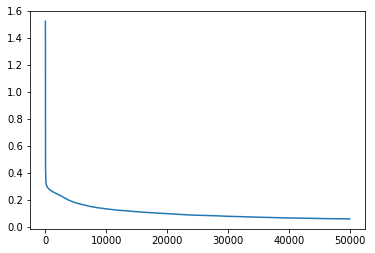

In [11]:
print "Prediction network:", np.argmax(a2,axis=1)
print "Ground truth:", np.argmax(y_train,axis=1)
plt.plot(loss_list)
plt.show()

Accuracy train:


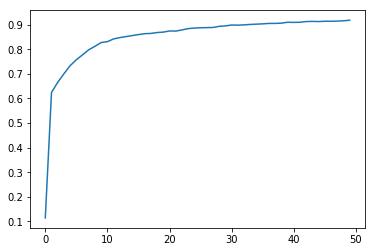

In [12]:
print "Accuracy train:"
plt.plot(accuracy_train_list)
plt.show()

Accuracy test:


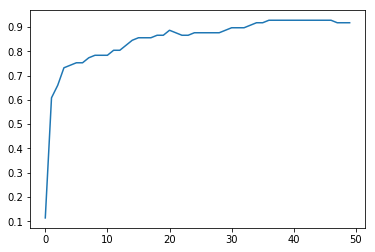

In [13]:
print "Accuracy test:"
plt.plot(accuracy_test_list)
plt.show()

**Question: What is the accuracy you achieved on X_test?**

<Fill - in>

**What modifications did you do to receive this score?**